In [9]:
import seaborn as sns
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table

## Read tables

In [10]:
SWIRE_cat=Table.read('./data/dmu26_XID+MIPS_XMM-LSS_SWIREnSPUDS_concat20190105.fits')

In [11]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J021846.087-062301.346,34.692030947564795,-6.383707158297614,30.09487,46.226128,14.67685,-0.0009270066,4.858147e-06,nan,1142.0,0.0
HELP_J021843.070-062345.559,34.6794586722776,-6.39598871477323,4170.4424,4190.5127,4150.0,-0.0009270066,4.858147e-06,nan,2000.0,0.373
HELP_J021852.610-062138.457,34.7192093322776,-6.36068236477323,327.6509,346.8575,307.92105,-0.0046012965,4.779417e-06,nan,1248.0,0.0
HELP_J021854.601-062151.326,34.7275025122776,-6.36425716477323,65.46506,83.40683,47.538906,-0.0046012965,4.779417e-06,nan,1179.0,0.398
HELP_J021851.714-062215.569,34.7154747122776,-6.3709913347732305,3.1386747,7.2766647,0.9495287,-0.0046012965,4.779417e-06,nan,1711.0,0.0
HELP_J021911.572-062135.966,34.7982186822776,-6.359990434773231,554.56165,571.6919,537.1004,-0.012682672,4.8390184e-06,nan,555.0,0.0
HELP_J021917.826-062026.091,34.8242763422776,-6.34058070477323,963.8944,982.96875,944.89764,-0.005463596,4.9658024e-06,nan,893.0,0.011
HELP_J021923.350-061946.651,34.8472902722776,-6.32962525477323,2255.2812,2275.3945,2235.6658,0.0036527414,4.8568736e-06,nan,2000.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

6.9675155


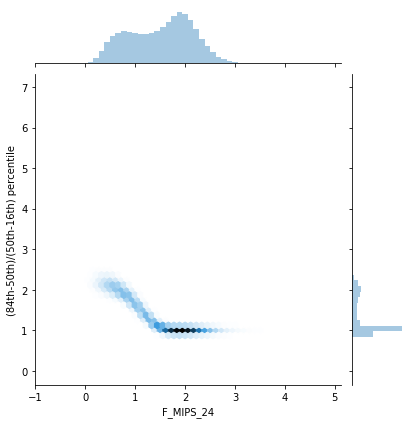

In [12]:
skew=(SWIRE_cat['FErr_MIPS_24_u']-SWIRE_cat['F_MIPS_24'])/(SWIRE_cat['F_MIPS_24']-SWIRE_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 7
#g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24']),y=skew, kind='hex')
#print(np.max(skew))

g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))



Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [13]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_mips_24'))


In [14]:
ind_SWIRE=(SWIRE_cat['Pval_res_24']>0.5) | (SWIRE_cat['F_MIPS_24'] < 20.0)

In [15]:
SWIRE_cat['flag_mips_24'][ind_SWIRE]=True


In [16]:
SWIRE_cat.write('./data/dmu26_XID+MIPS_XMM-LSS_SWIREnSPUDS_concat_20190106.fits', format='fits',overwrite=True)